## Notes

You dont need to look at all full linear models because they yield the same shap values (as they should be because those are just different transformations of the same features) The meta_onehot I supposed it to be some kind of meta data that cannot provide any help for forecasting but I still did it just in case.

## Full Model 1 - tanh v poi COVID-US fixed space (meaning we care onlyh about temporal)

In [11]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 4.0 MB/s eta 0:00:00


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap

# Load the dataset
data_path = '/content/COVID-US-51x1-20191114-20200531.npz'
data = np.load(data_path)

# and 'poi' as target, where we'll predict the average value for simplicity
X = data['meta_onehot']  # Features
y = data['poi'].mean(axis=(1, 2))  # Target: Average over spatial dimensions for simplicity

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Initialize a SHAP explainer and compute SHAP values for the test set
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# SHAP mean values
shap_summaries = np.abs(shap_values.values).mean(axis=0)

# Displaying the importance of each feature based on SHAP values
feature_importance = pd.Series(shap_summaries, index=[f"Feature {i}" for i in range(X.shape[1])])
feature_importance


Feature 0     8.388428e+14
Feature 1     8.796001e+14
Feature 2     8.545770e+14
Feature 3     4.253928e+14
Feature 4     1.070307e+15
Feature 5     5.186608e+14
Feature 6     7.364755e+14
Feature 7     7.912610e+14
Feature 8     5.277601e+14
Feature 9     8.047204e+14
Feature 10    6.739178e+14
Feature 11    9.222531e+14
Feature 12    6.293691e+14
Feature 13    6.953391e+14
Feature 14    7.791286e+14
Feature 15    6.917373e+14
Feature 16    9.467075e+14
Feature 17    7.476601e+14
Feature 18    9.747638e+14
Feature 19    3.886164e+14
Feature 20    7.302198e+14
Feature 21    5.095614e+14
Feature 22    6.739178e+14
Feature 23    6.382788e+14
Feature 24    9.441704e+14
Feature 25    9.818544e+14
Feature 26    1.093995e+15
Feature 27    9.019312e+14
Feature 28    9.347287e+14
Feature 29    1.046870e+15
Feature 30    9.176674e+14
Feature 31    3.938346e+14
Feature 32    3.417272e+14
Feature 33    5.343654e+14
Feature 34    4.648384e+14
Feature 35    4.398829e+14
Feature 36    4.752145e+14
F

In [13]:
shap_summaries

array([8.38842789e+14, 8.79600122e+14, 8.54577015e+14, 4.25392818e+14,
       1.07030653e+15, 5.18660762e+14, 7.36475533e+14, 7.91260972e+14,
       5.27760073e+14, 8.04720370e+14, 6.73917766e+14, 9.22253145e+14,
       6.29369053e+14, 6.95339062e+14, 7.79128556e+14, 6.91737251e+14,
       9.46707545e+14, 7.47660104e+14, 9.74763756e+14, 3.88616433e+14,
       7.30219756e+14, 5.09561450e+14, 6.73917766e+14, 6.38278795e+14,
       9.44170402e+14, 9.81854396e+14, 1.09399534e+15, 9.01931200e+14,
       9.34728698e+14, 1.04686964e+15, 9.17667373e+14, 3.93834596e+14,
       3.41727249e+14, 5.34365383e+14, 4.64838429e+14, 4.39882948e+14,
       4.75214456e+14, 4.57605505e+14, 4.57398750e+02])

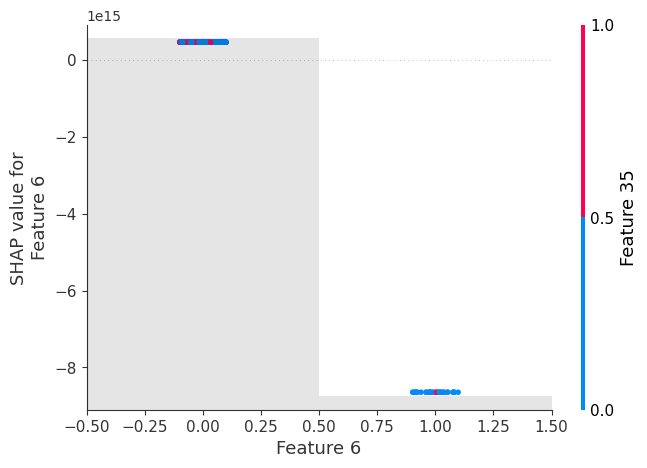

In [14]:
shap.plots.scatter(shap_values[:, 6], color=shap_values)


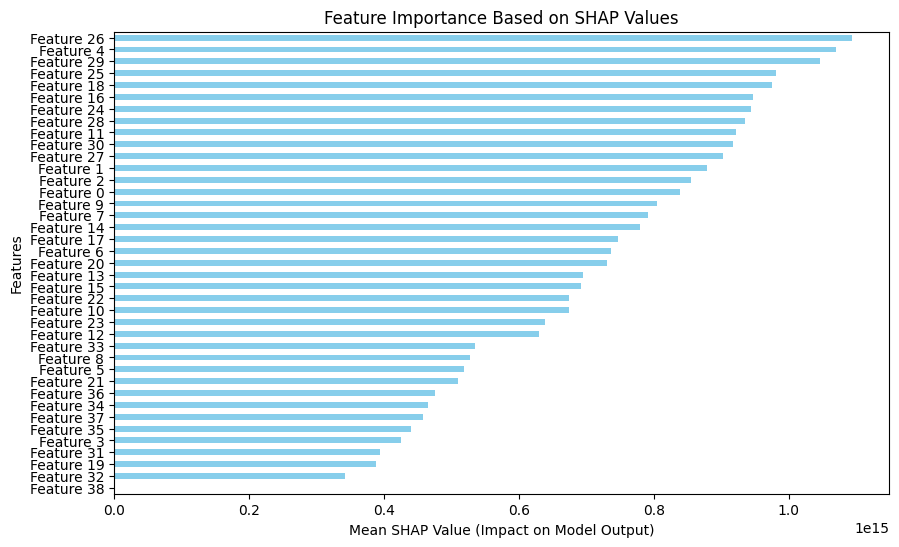

In [19]:
# Create a Series from the data
import matplotlib.pyplot as plt

feature_importance = pd.Series(feature_importance)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance Based on SHAP Values')
plt.xlabel('Mean SHAP Value (Impact on Model Output)')
plt.ylabel('Features')
plt.show()

## Full Model 2 - relu v poi COVID-US




In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap

# Load the dataset
data_path = '/content/COVID-US-51x1-20191114-20200531.npz'
data = np.load(data_path)

# and 'poi' as target, where we'll predict the average value for simplicity
X = data['tcov_relu']  # Features
y = data['poi'].mean(axis=(1, 2))  # Target: Average over spatial dimensions for simplicity

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Initialize a SHAP explainer and compute SHAP values for the test set
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# SHAP mean values
shap_summaries = np.abs(shap_values.values).mean(axis=0)

# Displaying the importance of each feature based on SHAP values
feature_importance = pd.Series(shap_summaries, index=[f"Feature {i}" for i in range(X.shape[1])])
feature_importance

Feature 0         0.000000
Feature 1       646.353996
Feature 2        73.768687
Feature 3      8588.990582
Feature 4    125732.109583
Feature 5       245.102912
Feature 6    123917.543468
Feature 7        41.184470
dtype: float64

## Full Model 3 - half v poi COVID-US

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap

# Load the dataset
data_path = '/content/COVID-US-51x1-20191114-20200531.npz'
data = np.load(data_path)

# and 'poi' as target, where we'll predict the average value for simplicity
X = data['tcov_half']  # Features
y = data['poi'].mean(axis=(1, 2))  # Target: Average over spatial dimensions for simplicity

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Initialize a SHAP explainer and compute SHAP values for the test set
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# SHAP mean values
shap_summaries = np.abs(shap_values.values).mean(axis=0)

# Displaying the importance of each feature based on SHAP values
feature_importance = pd.Series(shap_summaries, index=[f"Feature {i}" for i in range(X.shape[1])])
feature_importance

Feature 0         0.000000
Feature 1       646.353996
Feature 2        73.768687
Feature 3      8588.990582
Feature 4    125732.109583
Feature 5       245.102912
Feature 6    123917.543468
Feature 7        41.184470
dtype: float64